In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


float32


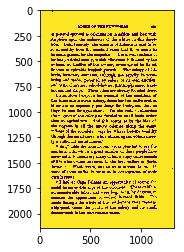

In [4]:
page = mean(imread("page.png"), 2)
page -= amin(page)
page /= amax(page)
print page.dtype
imshow(page)

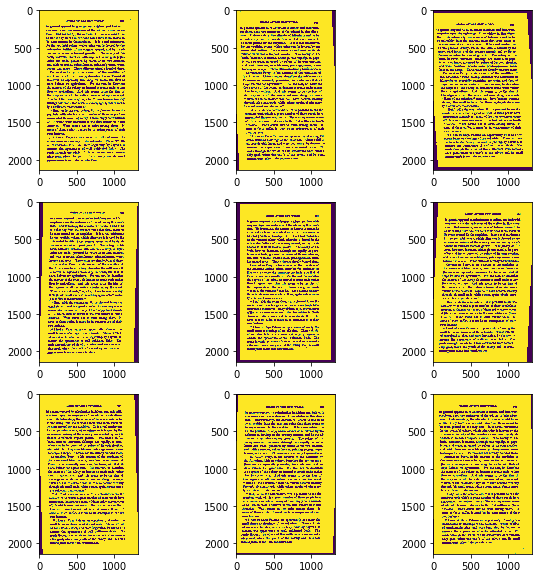

In [10]:
figsize(10,10)
from scipy.ndimage import interpolation

def rgeometry(image,eps=0.03,delta=0.3):
    m = array([[1+eps*randn(),0.0],[eps*randn(),1.0+eps*randn()]])
    w,h = image.shape
    c = array([w/2.0,h/2])
    d = c-dot(m,c)+array([randn()*delta,randn()*delta])
    return interpolation.affine_transform(image,m,offset=d,order=1,mode='constant',cval=image[0,0])

for i in range(9):
    subplot(3,3,i+1)
    imshow(rgeometry(page))

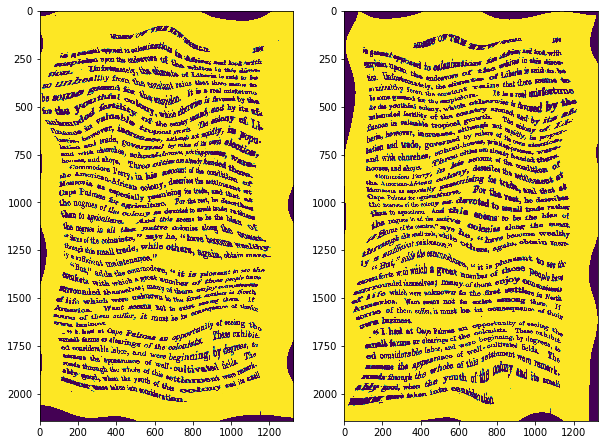

In [13]:
from scipy.ndimage import filters

def rdistort(image,distort=3.0,dsigma=10.0,cval=0):
    h,w = image.shape
    hs = randn(h,w)
    ws = randn(h,w)
    hs = filters.gaussian_filter(hs,dsigma)
    ws = filters.gaussian_filter(ws,dsigma)
    hs *= distort/amax(hs)
    ws *= distort/amax(ws)
    def f(p):
        return (p[0]+hs[p[0],p[1]],p[1]+ws[p[0],p[1]])
    return interpolation.geometric_transform(image,f,output_shape=(h,w),
        order=1,mode='constant',cval=cval)

for i in range(2):
    subplot(1,2,i+1)
    imshow(rdistort(page, distort=100.0, dsigma=100.0))

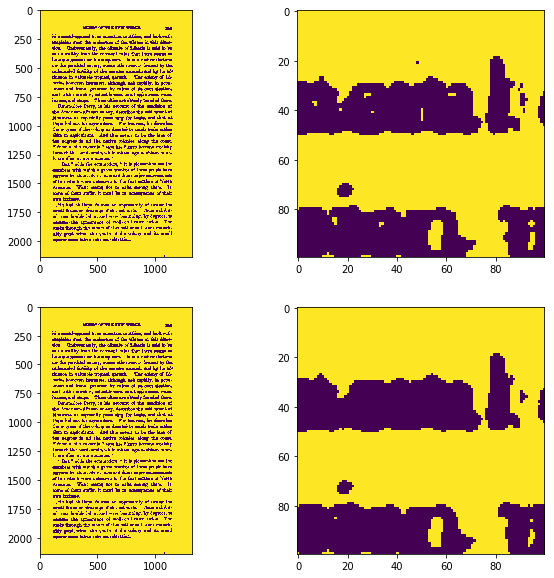

In [20]:
def rnoise(image, threshold=0.5, sigma=1.0, strength=0.1, nmax=0.1):
    a = asarray(image,'f')
    a = a*1.0/amax(a)
    if sigma>0.0:
        a = filters.gaussian_filter(a,sigma)
    a += clip(randn(*a.shape)*strength,-nmax, nmax)
    a = array(a>threshold,'f')
    return a

noisy = rnoise(page)
subplot(221)
imshow(page)
subplot(222)
imshow(page[200:300,200:300])
subplot(223)
imshow(noisy)
subplot(224)
imshow(noisy[200:300,200:300])

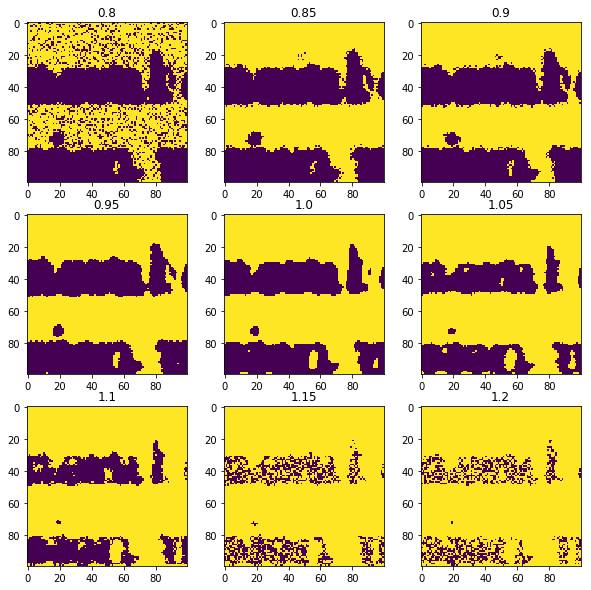

In [24]:
def rnoisex(image, density=1.0, threshold=0.5, sigma=1.0, strength=0.1, nmax=0.1):
    a = asarray(image,'f')
    a = a*1.0/amax(a)
    orig = sum(a>threshold)
    if sigma>0.0:
        a = filters.gaussian_filter(a,sigma)
    a += clip(randn(*a.shape)*strength,-nmax, nmax)
    thresholds = linspace(0.0, 1.0, 50)
    sums = array([sum(a>t) for t in thresholds])
    best = argmin(abs(density*orig-sums))
    a = array(a>thresholds[best],'f')
    return a

for i,t in enumerate(linspace(0.8, 1.2, 9)):
    subplot(3,3,i+1)
    title("%s" % t)
    imshow(rnoisex(page, density=t)[200:300,200:300])